<!--NAVIGATION-->
< [特征工程](05.04-Feature-Engineering.ipynb) | [目录](Index.ipynb) | [深入：线性回归](05.06-Linear-Regression.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# In Depth: Naive Bayes Classification

# 深入：朴素贝叶斯分类

> The previous four sections have given a general overview of the concepts of machine learning.
In this section and the ones that follow, we will be taking a closer look at several specific algorithms for supervised and unsupervised learning, starting here with naive Bayes classification.

前面四个小节对机器学习的概念给出了概述。本节开始，我们会进入到有监督学习和无监督学习的一些特定算法当中，进行较深入的介绍。首先从本节的朴素贝叶斯分类开始。

> Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.
Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.
This section will focus on an intuitive explanation of how naive Bayes classifiers work, followed by a couple examples of them in action on some datasets.

朴素贝叶斯模型是一组非常快和简单的分类算法，它们经常用来对高维度数据集进行分类处理。因为它们非常快和有一些可调的参数，它们最终成为了分类问题很好用的临时基线方法。本节会聚焦在对朴素贝叶斯分类器工作原理的直观介绍，然后会在不同的数据集上应用它作为例子。

## Bayesian Classification

## 贝叶斯分类

> Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

朴素贝叶斯分类建立在贝叶斯分类方法的基础上。这些分类方法的基础是贝叶斯定理，这是一个用来描述统计理论中条件概率的等式。在贝叶斯分类中，我们感兴趣的是在给定观测特征数据上找到一个标签的概率，我们写做$P(L~|~{\rm features})$。贝叶斯定理告诉我们如何使用这些已知的特征量直接计算概率：

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

> If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

如果我们尝试在两个标签中去选择，假设我们称它们为$L_1$和$L_2$，那么做这个选择的一种方法是计算每一个标签的后验概率：

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

> All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

因此我们所需要的就是一个能够计算每一个标签的$P({\rm features}~|~L_i)$值的模型。这个模型被称为*生成模型*，因为它指定了产生数据的假设随机过程。对于训练贝叶斯分类器来说，为每个标签找到这样的通用模型是最主要的步骤。获得这种训练步骤的通用版本是很困难的，但是我们能够通过使用关于该模型的假设来简化这项任务。

> This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

这就是“朴素贝叶斯”中的“朴素”的由来：如果我们对通用模型中的每个标签作出非常朴素的假设，我们就可以找到通用模型中每个标签的大概分布，然后进行贝叶斯分类。不同的朴素贝叶斯分类器取决于对数据不同的朴素假设上，我们在本节后续内容中会介绍它们中的一部分。

> We begin with the standard imports:

首先是需要用到的包：

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Gaussian Naive Bayes

## 高斯朴素贝叶斯

> Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.
In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.
Imagine that you have the following data:

朴素贝叶斯分类器中最容易理解的也许就是高斯朴素贝叶斯。这个分类器假定*每个标签的数据都服从简单正态分布*。例如你有如下数据：

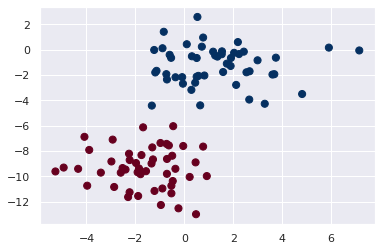

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

> One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.
This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.
The result of this naive Gaussian assumption is shown in the following figure:

创建一个简单模型的最快速方法就是假定数据服从一个两个维度之间没有协方差的正态分布。这个模型可以通过简单的寻找每个标签中点的均值和标准差来拟合，你只需要定义这个分布即可。高斯朴素假设的结果显示在下图中：

![(run code in Appendix to generate image)](figures/05.05-gaussian-NB.png)
[附录中生成图像的代码](06.00-Figure-Code.ipynb#Gaussian-Naive-Bayes)

> The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.
With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

上图中的椭圆表示每个标签的高斯生成模型，越接近椭圆中心位置具有越大的概率。有了每个分类的生成模型后，我们就能简单的计算每一个点的概率$P({\rm features}~|~L_1)$，也就是后验概率，然后找到哪个标签在给定数据点上具有最大的概率。

> This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

这个过程在Scikit-Learn中实现成了`sklearn.naive_bayes.GaussianNB`评估器：

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

> Now let's generate some new data and predict the label:

现在让我们创建一些新数据，然后预测标签：

In [4]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

> Now we can plot this new data to get an idea of where the decision boundary is:

下面我们将新数据点绘制在图上，你能看到分类判定的边界位置：

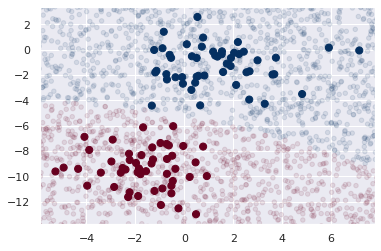

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

> We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

我们看到分类之间的边界是有点弯曲的，因为通常来说，高斯朴素贝叶斯的边界是二次曲线。

> A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

这种贝叶斯分类方法的一个好处是它天然支持概率分类，我们可以通过`predict_proba`计算每个分类的概率：

In [6]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

> The columns give the posterior probabilities of the first and second label, respectively.
If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

上面结果中的两列分别给出了两个标签的后验概率。如果你在寻找你分类中的不确定性的话，贝叶斯方法能提供有效的判断依据。

> Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results.
Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

当然最终分类结果最多只能达到模型的假定情况，这表明高斯朴素贝叶斯方法常常不会产生非常好的结果。但是在很多情况下，特别是当特征数量变得很大时，这个假定并不会导致高斯朴素贝叶斯方法完全失去意义。

## Multinomial Naive Bayes

## 多项式朴素贝叶斯

> The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

前面描述的高斯假设不是唯一的简单假设可以用来为每个标签产生生成分布。另一个有用的方法是多项式朴素贝叶斯，这个方法假定数据的特征是从一个简单的多项式分布中生成的。多项式分布描述了在一些分组中观察到的计数的概率，因此多项式朴素贝叶斯对于表达计数或计数的比例之类的特征是最合适的。

> The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

这里的原理和前面是一样的，只是不是使用正态分布来拟合数据模型，而是使用多项式分布来拟合数据模型。

### Example: Classifying Text

### 例子：分类文字

> One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
We discussed the extraction of such features from text in [Feature Engineering](05.04-Feature-Engineering.ipynb); here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

多项式朴素贝叶斯经常被用到的场合是文字分类，因为这个场景下的特征是单词的计数或者文档中单词出现的频率。我们在[特征工程](05.04-Feature-Engineering.ipynb)一节中介绍过在文本中提取这样的特征的方法；这里我们会使用20个新闻组的语料库提取出来的稀疏单词计数特征来展示将这些短文档分类的方法。

> Let's download the data and take a look at the target names:

让我们下载这个数据然后查看一下目标分类的名称：

In [7]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

> For simplicity here, we will select just a few of these categories, and download the training and testing set:

这里为了简化，我们仅选择其中部分分类，然后载入训练集和测试集：

In [8]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

> Here is a representative entry from the data:

下面展示部分数据：

In [9]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



> In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer (discussed in [Feature Engineering](05.04-Feature-Engineering.ipynb)), and create a pipeline that attaches it to a multinomial naive Bayes classifier:

为了要将这个数据集应用到机器学习上，我们需要将数据中的每个字符串内容转换为数字的向量。我们使用TF-IDF来实现向量化（参见[特征工程](05.04-Feature-Engineering.ipynb)），然后创建一个管道操作将一个多项式朴素贝叶斯分类器连接进来：

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

> With this pipeline, we can apply the model to the training data, and predict labels for the test data:

我们可以将这个管道应用到训练集上，然后在测试集上去进行标签预测：

In [11]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

> Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

有了对测试数据预测的标签之后，我们可以对评估器的性能作出判断。例如下面展示了预测标签和实际标签之间的混淆矩阵：

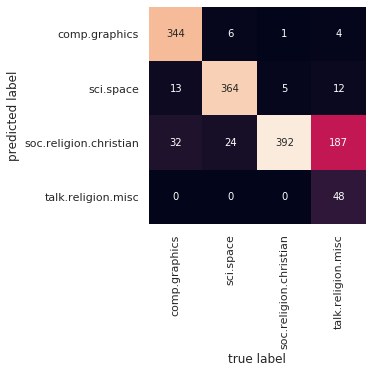

In [12]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

> Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

从上图看出，即便是这么简单的分类器也能成功的将宇宙学讨论和计算机科学讨论内容区分开，但是它在将宗教讨论和基督教讨论区分的时候遇到了困难。因为可能这是一个本来就容易混淆的领域。

> The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

我们现在有了一个模型来对*任何*字符串进行分类检测了，非常酷对不对，只需要在这个管道对象上使用`predict()`方法即可。下面我们创建一个简单的工具函数来对任何字符串输入返回标签预测的输出结果：

In [13]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

> Let's try it out:

赶快来试一下：

In [14]:
predict_category('sending a payload to the ISS')

'sci.space'

In [15]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [16]:
predict_category('determining the screen resolution')

'comp.graphics'

> Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

请记住这里做的事情仅是对字符串中每个单词的（加权）出现频率生成了一个概率模型而已；然而结果却令人惊奇。即使非常朴素的算法，只要小心使用，并且在一个大规模的高维度数据集上进行训练的话，也能非常有效。

## When to Use Naive Bayes

## 何时使用朴素贝叶斯方法

> Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

> - They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

因为朴素贝叶斯分类器对数据进行了如此严格的假设，它们通常不会比其他复杂的模型更加有效。朴素贝叶斯方法有下面几个优点：

- 它们非常快，无论是在训练还是预测中
- 它们提供了直接的概率预测
- 它们通常很容易解释
- 它们有很少的可调参数

> These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

这些特点导致朴素贝叶斯分类器经常被作为初始化的基线分类标准。如果它性能很好，恭喜：你的问题已经有了一个非常快速很容易解释的分类模型了。如果它的性能不如人意，那么你可以开始尝试更加复杂的模型，然后将朴素贝叶斯分类器的性能结果作为标准来对新的模型进行评判。

> Naive Bayes classifiers tend to perform especially well in one of the following situations:

> - When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

朴素贝叶斯分类器在下面的一些情况下通常能够特别良好的工作：

- 当朴素假定能够拟合数据时（实践中非常少见）
- 对于数据本身分类就已经很清晰的情况，此时模型复杂度并不十分重要
- 对于数据维度非常多的情况，此时模型复杂度并不十分重要

> The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

后两点看起来是独立的因素，但是实际上它们是关联的：当数据集的维度增加时，两个数据点非常接近的情况是非常少见的（毕竟它们要在*每个维度*都接近才能互相接近）。这意味着高纬度中的分类相对于低维度数据，如果新增的维度确实增加了数据的信息量（特征）的话，高维度数据点会倾向于出现在更不同的位置。因此像朴素贝叶斯这样的简单分类器在数据维度增加情况下可能会比复杂分类器工作的更好：一旦你有了足够的数据，哪怕是简单的模型也能非常强大。

<!--NAVIGATION-->
< [特征工程](05.04-Feature-Engineering.ipynb) | [目录](Index.ipynb) | [深入：线性回归](05.06-Linear-Regression.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
